# DATA

The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv) which predicts whether or not the policy holder will claim insurance in the next 6 months.

# IMPORTING



In [1]:
# import all relevant libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating a variable to hold the file path as a python string
file_path = '/content/train.csv'

# PREPARATION



In [3]:
# create a dataframe from the csv file using the pandas read_csv function
dataset = pd.read_csv(file_path)
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# print the first 3 rows of the dataset
dataset.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0.0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0.0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0.0,0.0


In [5]:
# print the last 3 rows of the dataset
dataset.tail(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
35564,ID35565,0.024346,0.10,0.490385,C12,34791,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0,0.0
35565,ID35566,0.620603,0.08,0.500000,C5,34738,5,C1,M9,Diesel,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,0.0
35566,ID35567,0.193460,0.14,0.307692,C7,6112,3,C2,M4,Diesel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(35567, 44)

In [7]:
# Print a concise summary of a DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35567 entries, 0 to 35566
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         35567 non-null  object 
 1   policy_tenure                     35567 non-null  float64
 2   age_of_car                        35567 non-null  float64
 3   age_of_policyholder               35567 non-null  float64
 4   area_cluster                      35567 non-null  object 
 5   population_density                35567 non-null  int64  
 6   make                              35567 non-null  int64  
 7   segment                           35567 non-null  object 
 8   model                             35567 non-null  object 
 9   fuel_type                         35567 non-null  object 
 10  max_torque                        35567 non-null  object 
 11  max_power                         35567 non-null  object 
 12  engi

In [8]:
# Generate a descriptive statistics.
# Descriptive statistics include those that summarize the central
# tendency, dispersion and shape of the
# dataset's distribution, excluding null values.
dataset.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35567.000000,35566.000000,35566.000000
mean,0.611568,0.069463,0.468943,18877.773863,1.762364,3.129024,1161.571457,3.626030,5.243259,4.852071,3849.174937,1671.946580,1552.969522,1384.325189,1.757999,0.064106
std,0.414413,0.057004,0.122597,17711.097308,1.138296,1.828770,266.228473,0.483863,0.429056,0.227605,310.939841,112.088484,79.519804,212.001522,1.393061,0.244945
min,0.002739,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.208772,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.574319,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039531,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.376478,1.000000,0.990385,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [9]:
# gets the sum rows of missing values for each column
dataset.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [10]:
dataset.shape

(35567, 44)

In [11]:
# checks for any duplicate rows in the dataset and return the sum of it
dataset.duplicated().sum()

0

Drop duplicates

In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
# dropping the policy_id column because that is of no use in the visualisation or prediction
dataset.drop('policy_id', axis=1, inplace=True)

In [14]:
# grouping the columns within the dataset
categorical_features = []
for column in dataset.columns:
  if dataset[column].dtype == 'object':
    categorical_features.append(column)

Conditional statements and looping. Also grouping by the data type

In [15]:
# looping through the columns to identify the numerical valued columns from the dataset
numerical_features = []
for column in dataset.columns:
  if dataset[column].dtype == 'int64' or dataset[column].dtype == 'float64':
    numerical_features.append(column)

In [16]:
print(categorical_features)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


Sorting

In [17]:
# sorting categorical features and since it is string, it will be sorted alphabetically
categorical_features = sorted(categorical_features)

In [18]:
print(categorical_features)

['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering', 'is_brake_assist', 'is_central_locking', 'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable', 'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera', 'is_parking_sensors', 'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger', 'is_rear_window_washer', 'is_rear_window_wiper', 'is_speed_alert', 'is_tpms', 'max_power', 'max_torque', 'model', 'rear_brakes_type', 'segment', 'steering_type', 'transmission_type']


In [19]:
print(numerical_features)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [20]:
# to drop the null values from the dataset
dataset.dropna(inplace=True)

In [21]:
dataset.shape

(35566, 43)

In [53]:
dataset.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [23]:
# loop through the categorical features and print the unique values within each column
for feature in categorical_features:
  print(feature)
  print(dataset[feature].unique())
  print(dataset[feature].nunique())
  print("\n")

area_cluster
['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
22


engine_type
['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
11


fuel_type
['CNG' 'Petrol' 'Diesel']
3


is_adjustable_steering
['No' 'Yes']
2


is_brake_assist
['No' 'Yes']
2


is_central_locking
['No' 'Yes']
2


is_day_night_rear_view_mirror
['No' 'Yes']
2


is_driver_seat_height_adjustable
['No' 'Yes']
2


is_ecw
['No' 'Yes']
2


is_esc
['No' 'Yes']
2


is_front_fog_lights
['No' 'Yes']
2


is_parking_camera
['No' 'Yes']
2


is_parking_sensors
['Yes' 'No']
2


is_power_door_locks
['No' 'Yes']
2


is_power_steering
['Yes' 'No']
2


is_rear_window_defogger
['No' 'Yes']
2


is_rear_window_washer
['No' 'Yes']
2


is_rear_window_wiper
['No' 'Yes']
2


is_speed_alert
['Yes' 'No']
2


is_tpms
['No' 'Yes']


Define a custom function to create reusable code. Also, using python dictionary here.

In [24]:
# defined a new function to map the unique categorical values to a number
def value_mapper(unique_values):
  i = 0
  m = {}
  for val in unique_values:
    m[val] = i
    i += 1
  return m

In [25]:
# Mapping categorical features to numerical values
for feature in categorical_features:
  unique_values = dataset[feature].unique()
  m = value_mapper(unique_values)
  dataset[feature] = dataset[feature].map(m)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35566 entries, 0 to 35565
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     35566 non-null  float64
 1   age_of_car                        35566 non-null  float64
 2   age_of_policyholder               35566 non-null  float64
 3   area_cluster                      35566 non-null  int64  
 4   population_density                35566 non-null  int64  
 5   make                              35566 non-null  int64  
 6   segment                           35566 non-null  int64  
 7   model                             35566 non-null  int64  
 8   fuel_type                         35566 non-null  int64  
 9   max_torque                        35566 non-null  int64  
 10  max_power                         35566 non-null  int64  
 11  engine_type                       35566 non-null  int64  
 12  airb

In [27]:
dataset.head(5)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0.672619,0.02,0.375000,1,27003,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0.841110,0.02,0.384615,2,4076,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0.900277,0.11,0.432692,3,21622,1,1,1,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
4,0.596403,0.11,0.634615,4,34738,2,0,2,1,2,...,0,1,1,0,0,1,1,0,2.0,0.0


In [28]:
for feature in categorical_features:
  print(feature)
  print(dataset[feature].unique())
  print(dataset[feature].nunique())
  print("\n")

area_cluster
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
22


engine_type
[ 0  1  2  3  4  5  6  7  8  9 10]
11


fuel_type
[0 1 2]
3


is_adjustable_steering
[0 1]
2


is_brake_assist
[0 1]
2


is_central_locking
[0 1]
2


is_day_night_rear_view_mirror
[0 1]
2


is_driver_seat_height_adjustable
[0 1]
2


is_ecw
[0 1]
2


is_esc
[0 1]
2


is_front_fog_lights
[0 1]
2


is_parking_camera
[0 1]
2


is_parking_sensors
[0 1]
2


is_power_door_locks
[0 1]
2


is_power_steering
[0 1]
2


is_rear_window_defogger
[0 1]
2


is_rear_window_washer
[0 1]
2


is_rear_window_wiper
[0 1]
2


is_speed_alert
[0 1]
2


is_tpms
[0 1]
2


max_power
[0 1 2 3 4 5 6 7 8]
9


max_torque
[0 1 2 3 4 5 6 7 8]
9


model
[ 0  1  2  3  4  5  6  7  8  9 10]
11


rear_brakes_type
[0 1]
2


segment
[0 1 2 3 4 5]
6


steering_type
[0 1 2]
3


transmission_type
[0 1]
2




In [29]:
# As this data set did not have any missing values but, to show how to identify missing values in the data set, I have included below functions 


# dataset.fillna(dataset.mean(numeric_only=True).round(1), inplace=True) # use mean
# dataset.fillna(dataset.median(numeric_only=True).round(1), inplace=True) # use median

In [30]:
# groupby the column area cluster
a = dataset.groupby('area_cluster')
a.first()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
area_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.515874,0.05,0.644231,4990,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0.672619,0.02,0.375000,27003,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0.841110,0.02,0.384615,4076,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0.900277,0.11,0.432692,21622,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
4,0.596403,0.11,0.634615,34738,2,0,2,1,2,2,...,0,1,1,0,0,1,1,0,2.0,0.0
5,1.018709,0.07,0.519231,13051,3,2,3,2,3,3,...,1,1,1,0,1,0,1,0,3.0,0.0
6,0.097992,0.16,0.403846,6112,4,3,4,2,4,4,...,0,1,1,0,0,0,1,0,5.0,0.0
7,0.509085,0.14,0.423077,8794,1,3,5,1,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
8,0.566255,0.04,0.442308,17804,1,3,6,1,1,1,...,1,1,1,0,1,1,1,0,0.0,0.0


In [31]:
dataset.value_counts('is_claim')

is_claim
0.0    33286
1.0     2280
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


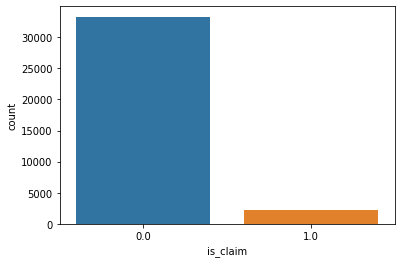

In [32]:
# using seaborn to create a countplot
sns.countplot(dataset['is_claim'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

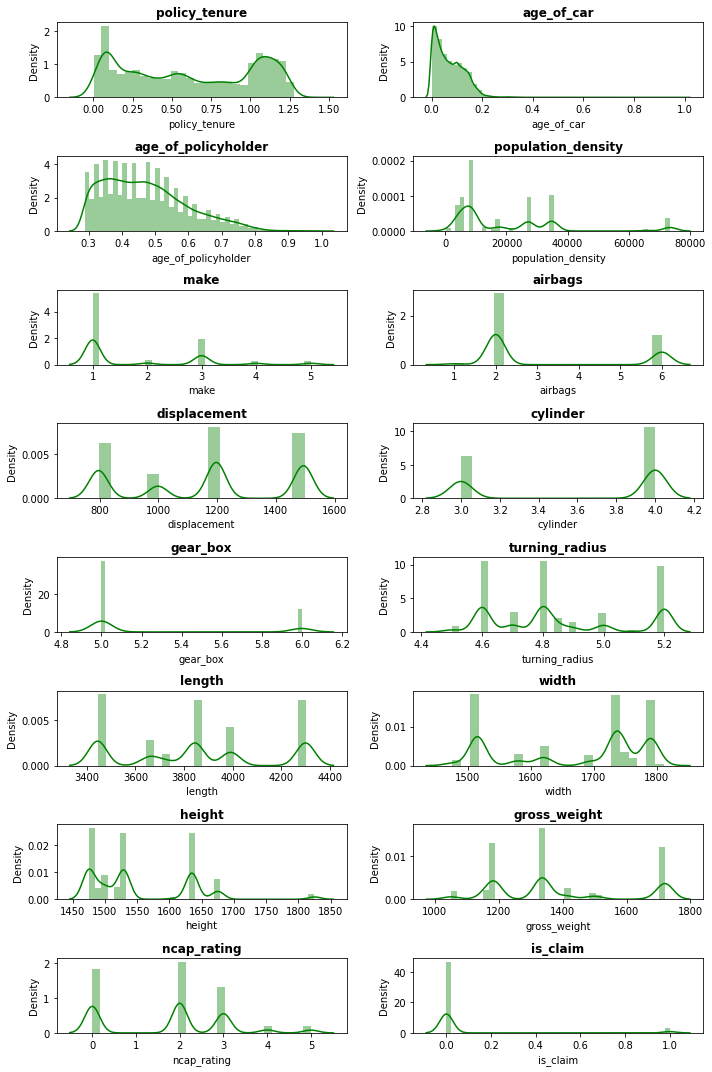

In [33]:
# creating distribution graphs for all the numerical columns within the dataset
plt.figure(figsize=(10,15)) # defining a figure size
for i, column in enumerate(numerical_features): # enumerate the numerical_features list to also get the index of the list item
  plot = plt.subplot(8, 2, i + 1) # defining a plot with 8 rows and 2 columns along with an id to the plot
  sns.distplot(dataset[column], color='green') # creating the distplot
  plt.title(column, weight='bold')
  plt.tight_layout() # to add necessary paddings automatically

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

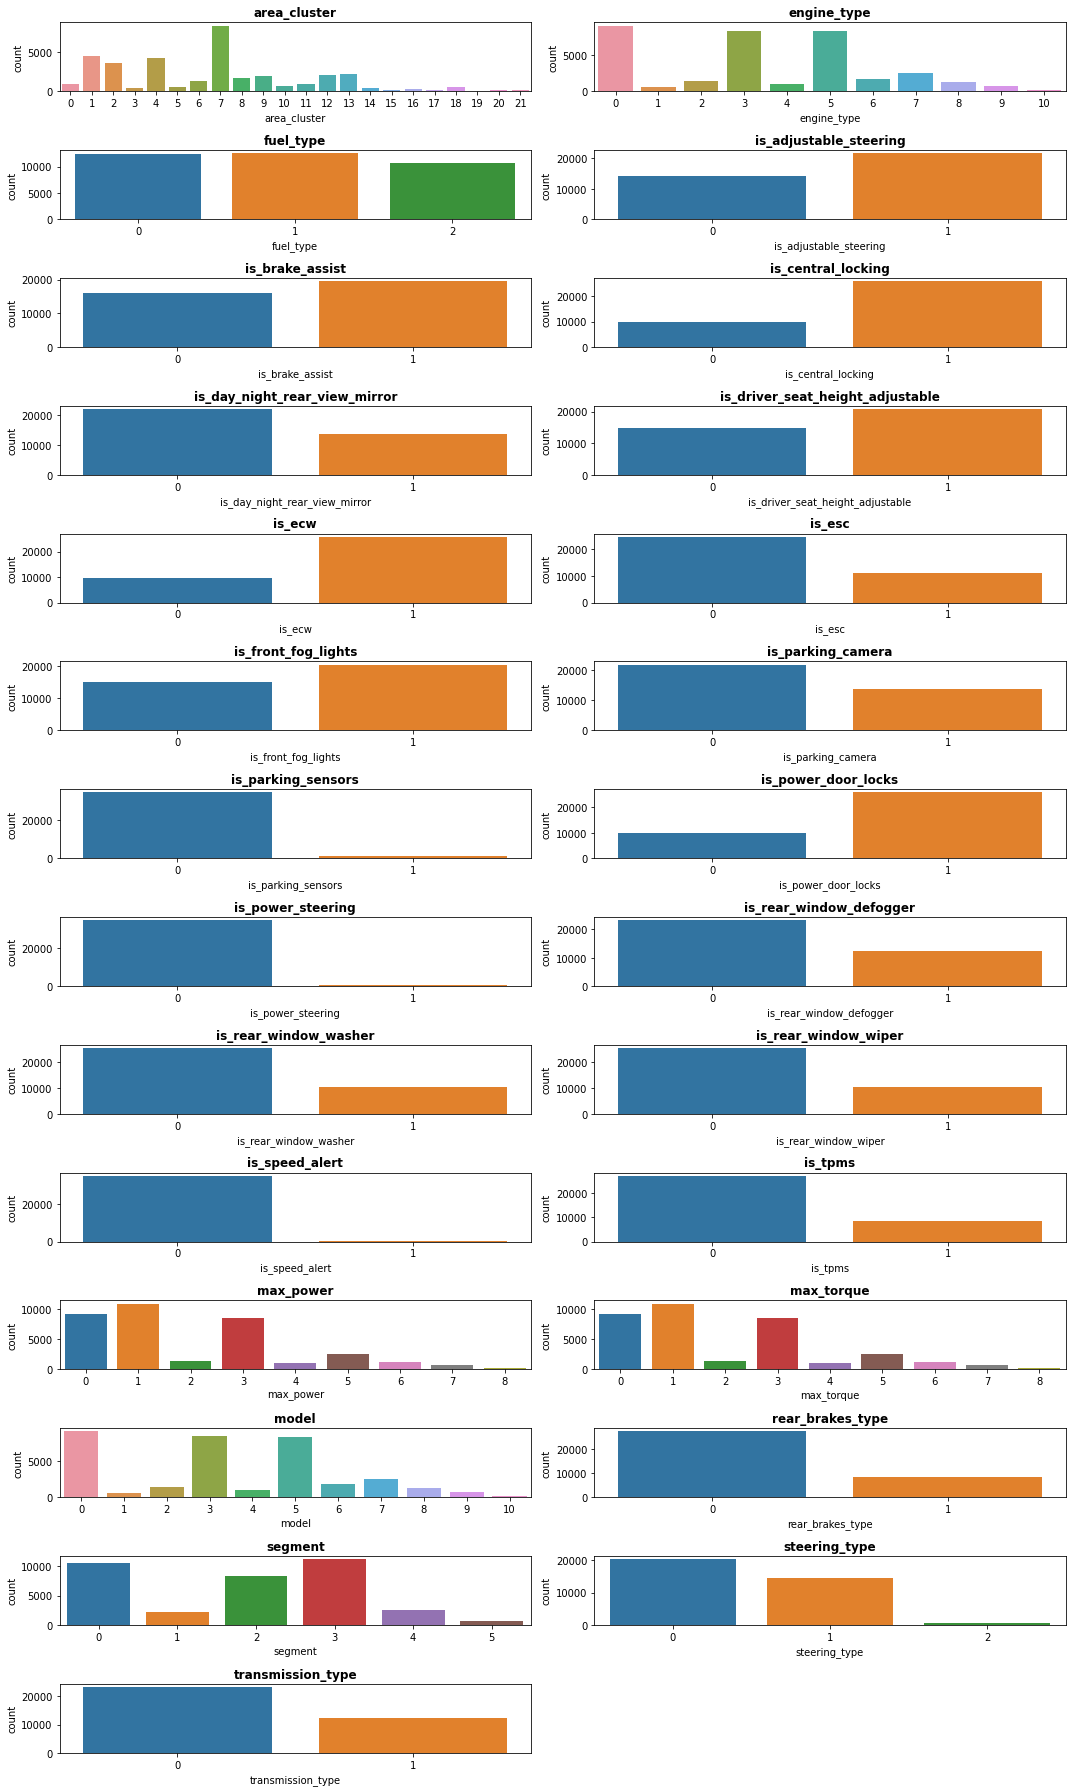

In [34]:
# creating a count plot here
plt.figure(figsize=(15,25))
for i, column in enumerate(categorical_features):
  plot = plt.subplot(14, 2, i + 1)
  sns.countplot(dataset[column])
  plt.title(column, weight='bold')
  plt.tight_layout()

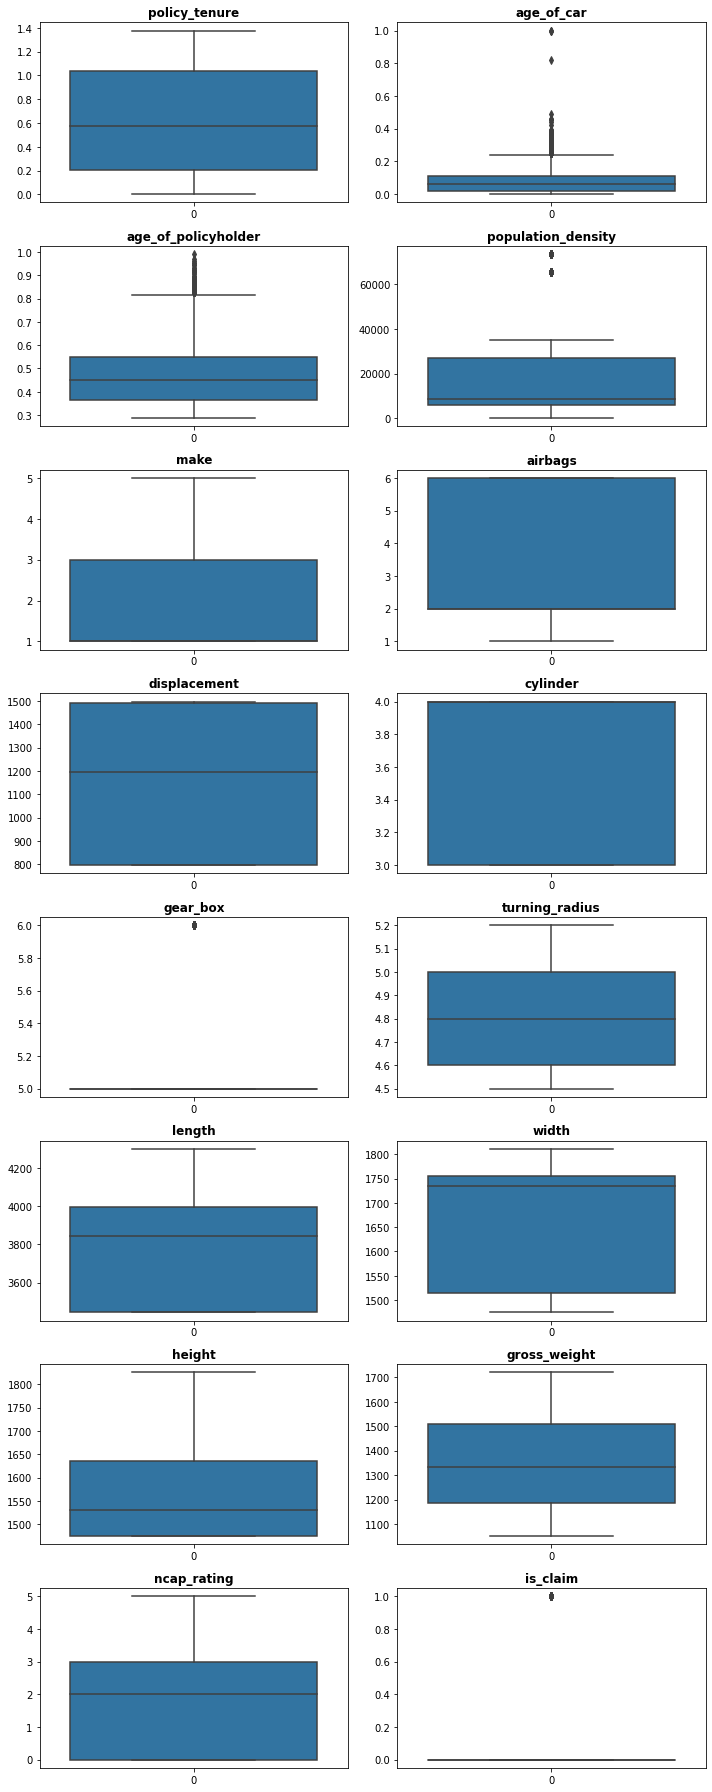

In [35]:
# creating a box plot here
plt.figure(figsize=(10,25))
for i, column in enumerate(numerical_features):
  plot = plt.subplot(8, 2, i + 1)
  sns.boxplot(data=dataset[column]);
  plt.title(column, weight='bold')
  plt.tight_layout()

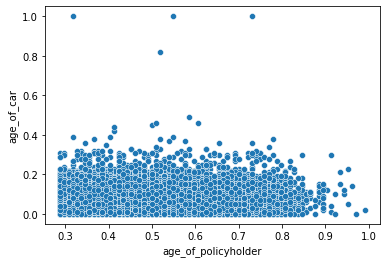

In [36]:
# creating a scatter plot here 
sns.scatterplot(data = dataset, x = "age_of_policyholder", y = "age_of_car")

# GET DATA FROM ONLINE API

In [37]:
# we need to make http requests to an endpoint to get data
# for that, we are installing the requests library
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import requests

In [39]:
# creating a variable to hold the api endpoint url
api_url = "https://finnhub.io/api/v1/stock/candle?symbol=AAPL&resolution=D&from=1640995200&to=1672531200&token=cf0adiiad3iasqg2se90cf0adiiad3iasqg2se9g"

In [40]:
# make a call to the API using the requests library's get function and the response is stored in the response variable
response = requests.get(api_url)

In [41]:
# convert the response to a json to be able to process it
online_data = response.json()
print(online_data)

{'c': [182.01, 179.7, 174.92, 172, 172.17, 172.19, 175.08, 175.53, 172.19, 173.07, 169.8, 166.23, 164.51, 162.41, 161.62, 159.78, 159.69, 159.22, 170.33, 174.78, 174.61, 175.84, 172.9, 172.39, 171.66, 174.83, 176.28, 172.12, 168.64, 168.88, 172.79, 172.55, 168.88, 167.3, 164.32, 160.07, 162.74, 164.85, 165.12, 163.2, 166.56, 166.23, 163.17, 159.3, 157.44, 162.95, 158.52, 154.73, 150.62, 155.09, 159.59, 160.62, 163.98, 165.38, 168.82, 170.21, 174.07, 174.72, 175.6, 178.96, 177.77, 174.61, 174.31, 178.44, 175.06, 171.83, 172.14, 170.09, 165.75, 167.66, 170.4, 165.29, 165.07, 167.4, 167.23, 166.42, 161.79, 162.88, 156.8, 156.57, 163.64, 157.65, 157.96, 159.48, 166.02, 156.77, 157.28, 152.06, 154.51, 146.5, 142.56, 147.11, 145.54, 149.24, 140.82, 137.35, 137.59, 143.11, 140.36, 140.52, 143.78, 149.64, 148.84, 148.71, 151.21, 145.38, 146.14, 148.71, 147.96, 142.64, 137.13, 131.88, 132.76, 135.43, 130.06, 131.56, 135.87, 135.35, 138.27, 141.66, 141.66, 137.44, 139.23, 136.72, 138.93, 141.56,

In [42]:
# we now get all the tags that we are intersted to create a dataset
opening_prices = online_data["o"] # opening prices
closing_prices = online_data["c"] # closing prices
lowest_prices = online_data["l"] # lowest prices
highest_prices = online_data["h"] # highest prices
timestamps = online_data["t"] # timestamps
volumes = online_data["v"] # volumes

In [43]:
import numpy as np

In [44]:
# here we use numpy to create a one dimentional array to hold all the row data. initially it will be an empty array
# later we will be reshaping this to be a 2D array (table)
rows = np.array([])

In [45]:
for i in range(len(opening_prices)): # loop through all the elements. here, we took the opening_prices list randomly as all the lists have same length
  row = [opening_prices[i], closing_prices[i], lowest_prices[i], highest_prices[i], timestamps[i], volumes[i]] # create a row
  rows = np.append(rows, row) # append that row to the list

In [46]:
print(rows)
rows.shape

[1.7783000e+02 1.8201000e+02 1.7771000e+02 ... 1.2995000e+02 1.6723584e+09
 7.7034209e+07]


(1506,)

In [47]:
# reshape the list with the length of the list as the number of rows and 6 as the number of columns in each row
# 6 is because we are looking into 6 items from the json data we got from the api
rows = rows.reshape(len(opening_prices), 6)

In [48]:
# using numpy savetxt function, we store the data as a csv file.
# also, we add the header accordingly
np.savetxt("data.csv", rows, delimiter=",", header='opening,closing,lowest,highest,timestamp,volumes')

In [49]:
pd.read_csv('/content/data.csv')

,# opening,closing,lowest,highest,timestamp,volumes
0,177.83,182.01,177.71,182.8800,1.641168e+09,104701220.0
1,182.63,179.70,179.12,182.9400,1.641254e+09,99310438.0
2,179.61,174.92,174.64,180.1700,1.641341e+09,94537602.0
3,172.70,172.00,171.64,175.3000,1.641427e+09,96903955.0
4,172.89,172.17,171.03,174.1400,1.641514e+09,86709147.0
...,...,...,...,...,...,...
246,130.92,131.86,129.64,132.4150,1.671754e+09,63814893.0
247,131.38,130.03,128.72,131.4100,1.672099e+09,69007830.0
248,129.67,126.04,125.87,131.0275,1.672186e+09,85438391.0
249,127.99,129.61,127.73,130.4814,1.672272e+09,75703710.0


In [50]:
Y = dataset['is_claim']
X = dataset.drop('is_claim', axis=1)

In [51]:
X.head(5)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0.672619,0.02,0.375000,1,27003,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.841110,0.02,0.384615,2,4076,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0.900277,0.11,0.432692,3,21622,1,1,1,1,1,...,1,1,1,1,0,1,1,1,0,2.0
4,0.596403,0.11,0.634615,4,34738,2,0,2,1,2,...,0,0,1,1,0,0,1,1,0,2.0


In [52]:
# joining X and Y together
X.join(Y)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0.672619,0.02,0.375000,1,27003,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0.841110,0.02,0.384615,2,4076,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0.900277,0.11,0.432692,3,21622,1,1,1,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
4,0.596403,0.11,0.634615,4,34738,2,0,2,1,2,...,0,1,1,0,0,1,1,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35561,1.071910,0.01,0.596154,7,8794,1,3,5,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
35562,0.109832,0.10,0.451923,1,27003,1,3,5,1,1,...,1,1,1,0,1,1,1,0,2.0,0.0
35563,0.432317,0.04,0.528846,1,27003,1,5,9,0,7,...,0,0,0,1,0,0,0,0,0.0,0.0
35564,0.024346,0.10,0.490385,11,34791,1,3,6,1,1,...,1,1,1,0,1,1,1,0,0.0,0.0
